# Classification Model
 
#####    - classify the compound as either "musk" or "non-musk"
####    - using logistic regression ,decision tree  and neural network ( multi-layer perceptron)

In [1]:
#import libraries
import numpy as np 
import pandas as pd


In [2]:
data=pd.read_csv(r"C:\Users\shilp\OneDrive\Desktop\musk_csv.csv" )

In [3]:
data.head(6)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1
5,6,MUSK-211,211_1+14,46,-194,-145,28,-117,72,57,...,-138,-156,56,143,142,164,-67,-145,40,1


In [4]:
data.shape

(6598, 170)

In [5]:
#checking for null values
data.isnull().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [6]:
pd.set_option('display.max_columns', 130)

In [7]:
data

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,...,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,-44,98,-33,-314,-282,-335,-144,-13,-197,-2,-144,-13,-11,-131,108,-43,42,-151,-4,8,-102,51,...,-247,-306,-308,-230,-166,-35,-205,-280,-239,-53,-10,-23,25,-5,163,61,59,-39,92,72,113,-107,80,25,-27,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,-153,113,-166,-318,-241,-329,-97,-69,-108,-179,-71,-27,-12,-133,107,-96,92,-140,48,26,-62,2,...,-281,-305,-294,-262,-165,-117,-244,-246,-231,3,-2,-3,15,49,99,37,84,22,66,131,109,-77,-10,-17,17,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,-172,93,-42,-317,-242,-331,-98,-71,-106,-128,-71,-26,-12,-131,147,-93,93,-139,40,51,-28,-179,...,-271,-305,-296,-265,-168,-119,-244,-247,-230,3,-2,-3,-23,12,128,38,85,24,61,122,74,-36,-129,19,41,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,-153,113,-163,-319,-242,-329,-97,-69,-108,-180,-71,-26,-12,-133,107,-95,93,-140,47,27,-63,-1,...,-282,-306,-295,-263,-166,-118,-244,-247,-231,3,-2,-3,14,50,99,37,84,23,66,131,109,-78,-12,-18,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,-153,113,-163,-319,-242,-329,-97,-69,-108,-180,-71,-26,-12,-133,107,-95,93,-140,47,27,-63,-1,...,-282,-306,-295,-263,-166,-118,-244,-247,-231,3,-2,-3,14,50,99,37,84,23,66,131,109,-78,-12,-18,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,-230,-28,-150,-63,-55,-77,-108,-308,-221,-41,-57,12,-112,-183,-198,-35,137,-198,-168,-153,-51,252,-108,135,-121,119,-120,73,28,-153,-20,-130,-59,73,

In [8]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,...,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,-119.456502,-84.929221,-61.911185,-127.935283,-123.005153,-265.690967,-53.415732,-67.741285,-52.352531,-44.902698,-75.645953,-55.783419,-61.619127,72.506062,32.285238,-69.659139,-15.361018,-102.665959,8.520764,12.553956,-82.314186,25.436193,-34.503183,-78.915732,-73.199000,115.882995,-115.562746,-7.853289,-75.578509,12.700667,-94.105335,24.210821,-45.615186,-121.602758,-125.547439,-170.321461,-95.759018,-87.315399,-24.237951,-54.001819,-91.248863,-67.800697,-55.654744,7.128221,80.092452,-62.756896,5.114580,-112.445893,26.498030,-36.375417,-23.988027,-54.988481,1.634435,-17.274022,...,-102.374204,-120.374659,-135.487572,-103.31070,-133.560473,-108.788724,-78.686875,-130.175053,-84.534101,-60.493786,-61.240376,-56.862989,-40.597908,-9.352380,61.939527,-42.358745,-17.505305,-52.381631,21.712337,63.267505,56.299939,-0.655199,-0.861928,51.431040,-46.587754,-19.476811,-68.070627,-94.963474,2.993786,-36.652774,-79.191422,-90.778266,-95.868142,-28.259473,-8.521067,-37.599121,-67.789330,-51.976508,-65.693089,-0.443165,1.331464,-21.754319,-165.748863,-87.364050,-113.114580,-18.523644,-41.386481,8.755077,-55.026069,-61.105335,-54.810397,-76.831161,33.209912,-61.212337,-210.975447,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,108.911397,79.541410,61.444281,101.191126,98.009158,70.647329,117.237608,61.403085,82.503477,79.304489,75.187995,101.908604,94.524709,123.334433,108.105908,101.325550,91.621335,73.778232,63.484770,126.086157,80.225924,106.627993,57.816952,118.201270,75.350809,57.070192,104.682519,85.732778,70.534415,80.750001,84.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [10]:
data.columns

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)

In [11]:
data["class"].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [12]:
data["molecule_name"].value_counts()

NON-MUSK-j146    1044
NON-MUSK-252     1010
NON-MUSK-j147     911
NON-MUSK-f146     383
NON-MUSK-288      344
                 ... 
NON-MUSK-290        2
NON-MUSK-308        2
NON-MUSK-358        2
NON-MUSK-j96        1
NON-MUSK-j97        1
Name: molecule_name, Length: 102, dtype: int64

In [13]:

data["conformation_name"].describe()

count         6598
unique        6598
top       197_1+29
freq             1
Name: conformation_name, dtype: object

In [14]:
from sklearn.model_selection import  train_test_split

In [15]:
y=data["class"]

In [16]:
x=data.drop(["conformation_name","molecule_name","ID","class"],axis=1)

In [19]:
X=np.array(x).astype(float)  
Y=np.array(y).astype(float)
X.shape

(6598, 166)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [21]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(x_train,y_train)
predicted_classes = model.predict(x_test)


C:\Users\shilp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
from sklearn import datasets, linear_model, metrics 
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test, predicted_classes)*100) 

Logistic Regression model accuracy(in %): 94.6969696969697


# Using Decision Tree


In [23]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier()
model1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
c=model1.predict(x_test)

In [25]:
print("decision tree model accuracy(in %):",  
metrics.accuracy_score(y_test,c)*100) 

decision tree model accuracy(in %): 96.43939393939394


# using deep learning model 

In [26]:
import matplotlib.pyplot as plt

In [87]:
import keras

In [88]:
from sklearn.preprocessing import StandardScaler
func= StandardScaler()
X= func.fit_transform(X)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [90]:
from keras.models import Sequential
from keras.layers import Dense, Activation


In [114]:
model = Sequential()
model.add(Dense(140,activation='sigmoid',input_dim = 166))
model.add(Dense(80, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])     
history=model.fit(x_train,y_train,shuffle=True, nb_epoch=14,batch_size=100,validation_split=0.2)



C:\Users\shilp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 4222 samples, validate on 1056 samples
Epoch 1/14
4222/4222 [==============================] - 5s 1ms/step - loss: 0.3897 - acc: 0.8335 - val_loss: 0.2681 - val_acc: 0.8996
Epoch 2/14
4222/4222 [==============================] - 0s 73us/step - loss: 0.2341 - acc: 0.9145 - val_loss: 0.1983 - val_acc: 0.9271
Epoch 3/14
4222/4222 [==============================] - 0s 78us/step - loss: 0.1856 - acc: 0.9280 - val_loss: 0.1777 - val_acc: 0.9337
Epoch 4/14
4222/4222 [==============================] - 0s 71us/step - loss: 0.1616 - acc: 0.9349 - val_loss: 0.1707 - val_acc: 0.9337
Epoch 5/14
4222/4222 [==============================] - 0s 71us/step - loss: 0.1488 - acc: 0.9417 - val_loss: 0.1503 - val_acc: 0.9498
Epoch 6/14
4222/4222 [==============================] - 0s 78us/step - loss: 0.1287 - acc: 0.9545 - val_loss: 0.1358 - val_acc: 0.9508
Epoch 7/14
4222/4222 [==============================] - 0s 71us/step - loss: 0.1171 - acc: 0.9571 - val_loss: 0.1294 - val_acc: 0.9517
Epoch 8/

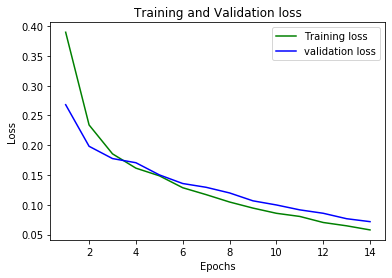

In [115]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,15)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

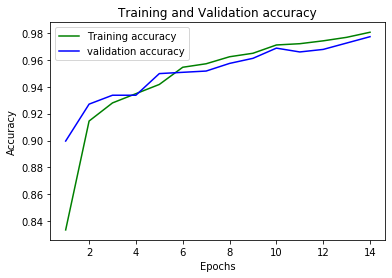

In [116]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,15)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [121]:
score = model.evaluate(x_test,y_test)
print("LOSS:")
print(score[0])
print("precision:")         
print(score[1])

1320/1320 [==============================] - 0s 106us/step
LOSS:
0.07837112137314045
precision:
0.9704545454545455
